<a href="https://colab.research.google.com/github/ColeBromfield01/bromfield-portfolio/blob/main/DATA604_Midterm_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 1**

All parts of this problem are completed in the code section.

**Problem 2**

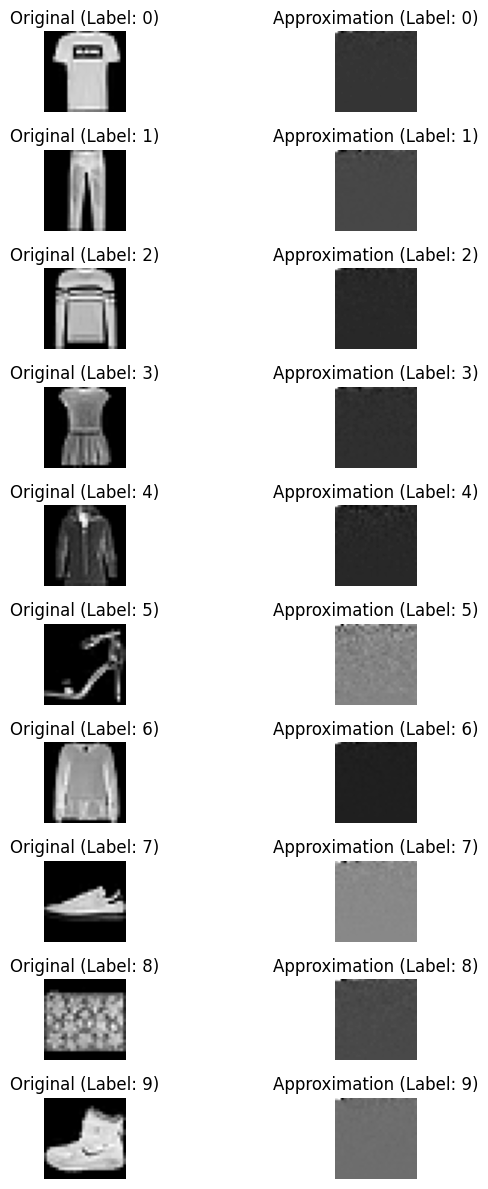

*Part A*

The new images have no discernible pattern or resemblance to their pre-transformation counterparts, more closely resembling TV static.

*Part B*

From a mathematical perspective, the columns of P form an orthogonal basis for R^784 based on the principal components of the data.  Let **x** represent a 784-dimensional image vector.  When we compute P**x**, we are projecting **x** onto this orthogonal basis for R^784.  Furthermore, if Q represents the first *n* rows of P, then Q**x** gives us the projection of **x** onto an orthogonal basis for R^n, based on the n principal components with the highest associated variance.

**Problem 3**

After multiplying each data point by P and running the kNN algorithm with the same train-test split used in Midterm 1, we saw an unchanged accuracy at 83.7%.  In essence, PCA neither hurts nor helps the classification when we retain all 784 principal components.  This is logical--without removing any dimensions, all original information is retained.  

The accuracy for each class is as follows:

| Class       |   Accuracy % |
|:------------|-------------:|
| T-shirt/top |        86.69 |
| Trouser     |        95.21 |
| Pullover    |        77.66 |
| Dress       |        85.9  |
| Coat        |        74.72 |
| Sandal      |        77.75 |
| Shirt       |        55.57 |
| Sneaker     |        93.74 |
| Bag         |        92.88 |
| Ankle boot  |        96.57 |

As with the overall accuracy, the accuracy for each class is identical to the corresponding accuracy found with the non-PCA kNN classifier used in Midterm 1.  

The confusion matrix below further illustrates how accuracy varies by label:

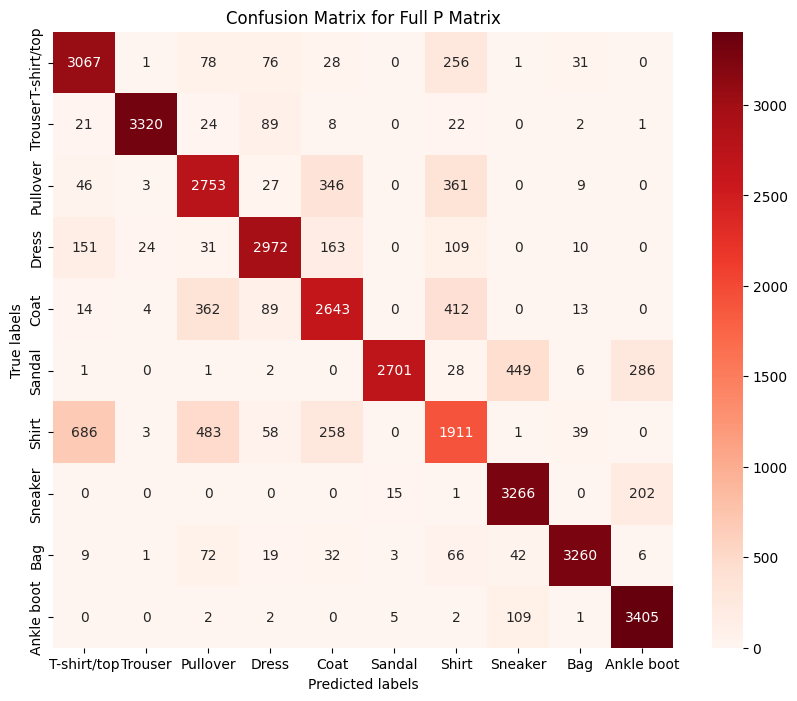

**Problem 4**

Running the kNN classifier on the PCA-reduced 200-dimensional data yielded a surprising result in the form of higher accuracy (84.7%) than the classifier performed on the full dataset.

While surprising at first, there are multiple factors that may have influenced this outcome.  Most notably, the kNN algorithm is famously susceptible to the curse of dimensionality (in which distances become increasingly uniform as dimensionality increases).  This is, of course, offset when we decrease the number of dimensions from 784 to 200.

Secondly, a significant number of the data points may be almost or completely irrelevant.  Just from the sample images generated in problem 2, we can see that a handful of pixels near the corners are always black, multiple other sections that frequently are as well.  Indeed, as the final code output shows, over 95% of the original variance is retained in the 200 principal components.

With very little information lost and decreased susceptibility to the curse of dimensionality, the increased accuracy is not unreasonable.

Here is a class-by-class breakdown of the accuracy with this model:

| Class       |   Accuracy % |
|:------------|-------------:|
| T-shirt/top |        86.15 |
| Trouser     |        95.33 |
| Pullover    |        76.25 |
| Dress       |        86.68 |
| Coat        |        76.84 |
| Sandal      |        83.36 |
| Shirt       |        57.57 |
| Sneaker     |        93.89 |
| Bag         |        94.36 |
| Ankle boot  |        96.23 |

As expected, we see similar accuracies for each class to what we saw in problem 3, with most classes slightly higher (although interestingly, a few saw a slight drop).

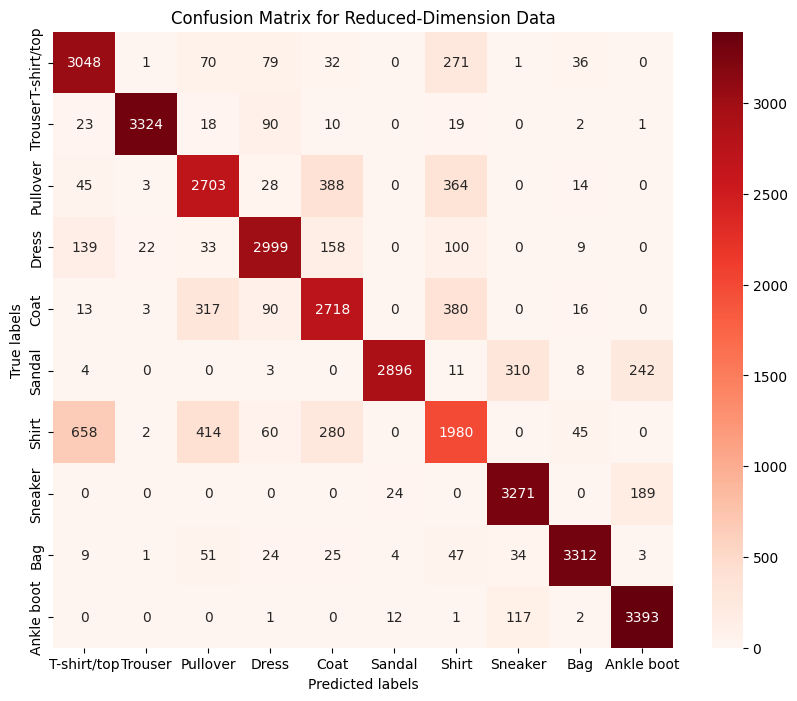

*Code for Problems 1-2*

In [1]:
import tensorflow as tf
(images1, labels1), (images2, labels2) = tf.keras.datasets.fashion_mnist.load_data()

images = tf.concat([images1, images2], axis=0)
labels = tf.concat([labels1, labels2], axis=0)

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

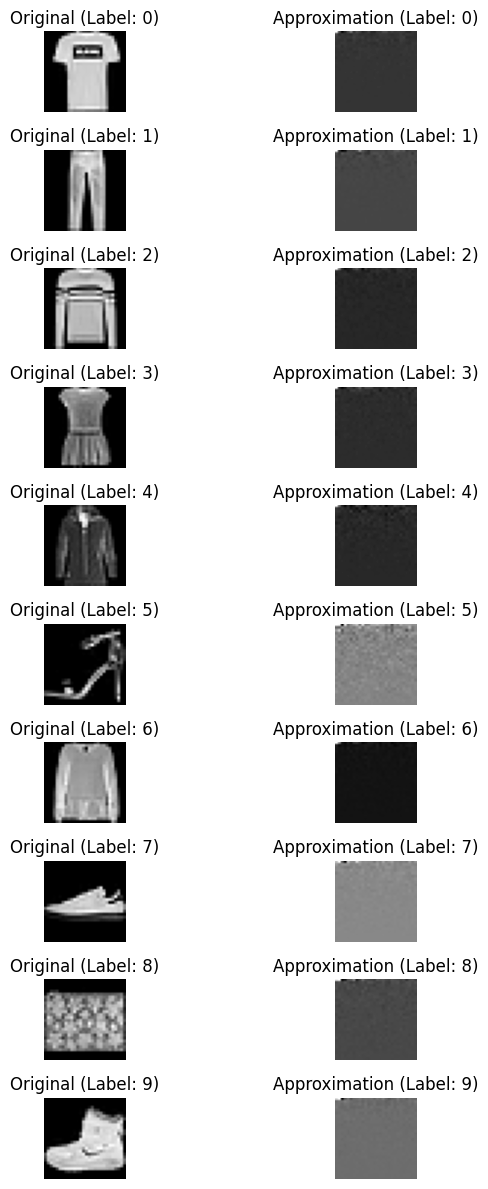

In [19]:
# Creating the same train-test split
train_labels = labels[:35000]
test_labels = labels[35000:]
train_images = np.array(images[:35000])
test_images = np.array(images[35000:])
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

train_images = tf.cast(train_images, tf.float32)

pca = PCA()
pca.fit(train_images)
P = pca.components_

# Generating one sample from each label
unique_labels = np.unique(labels)
selected_samples = []
for label in unique_labels:
    idx = np.where(train_labels == label)[0][0]
    selected_samples.append(train_images[idx])

# Displaying the x and Px image for each sample
num_samples = len(selected_samples)
fig, axes = plt.subplots(num_samples, 2, figsize=(8, 12))
for i, x in enumerate(selected_samples):
    # Original samples (x)
    axes[i, 0].imshow(tf.reshape(x, (28, 28)), cmap='gray')
    axes[i, 0].set_title('Original (Label: {})'.format(unique_labels[i]))
    axes[i, 0].axis('off')

    # Images from Px
    Px = np.dot(P, x)
    x_approx = np.dot(P.T, Px)
    axes[i, 1].imshow(tf.reshape(Px, (28, 28)), cmap='gray')
    axes[i, 1].set_title('Approximation (Label: {})'.format(unique_labels[i]))
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()

*Code for Problem 3*

In [21]:
# Applying P to all data points
p_train_images = np.transpose(np.dot(P, np.transpose(train_images)))
p_test_images = np.dot(P, test_images.T).T

Importing necessary libraries and defining kNN function

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

def knn(train, test, train_labels, test_labels, k):
  train_flat = train.reshape(train.shape[0], -1)
  test_flat = test.reshape(test.shape[0], -1)

  knn = KNeighborsClassifier(n_neighbors=k)

  knn.fit(train_flat, train_labels) # Fit the data

  predicted_labels = knn.predict(test_flat)

  # Generating the accuracy of the model
  accuracy = accuracy_score(test_labels, predicted_labels)

  # Generating a confusion matrix to display the accuracy by class
  cm = confusion_matrix(test_labels, predicted_labels)

  return(accuracy, cm)

With the function defined and the Px data in the correct format, we can run the classifier

In [22]:
accuracy, cm_full = knn(p_train_images, p_test_images, train_labels, test_labels, 20)

print(f"Accuracy: {accuracy}")

Accuracy: 0.8370857142857143


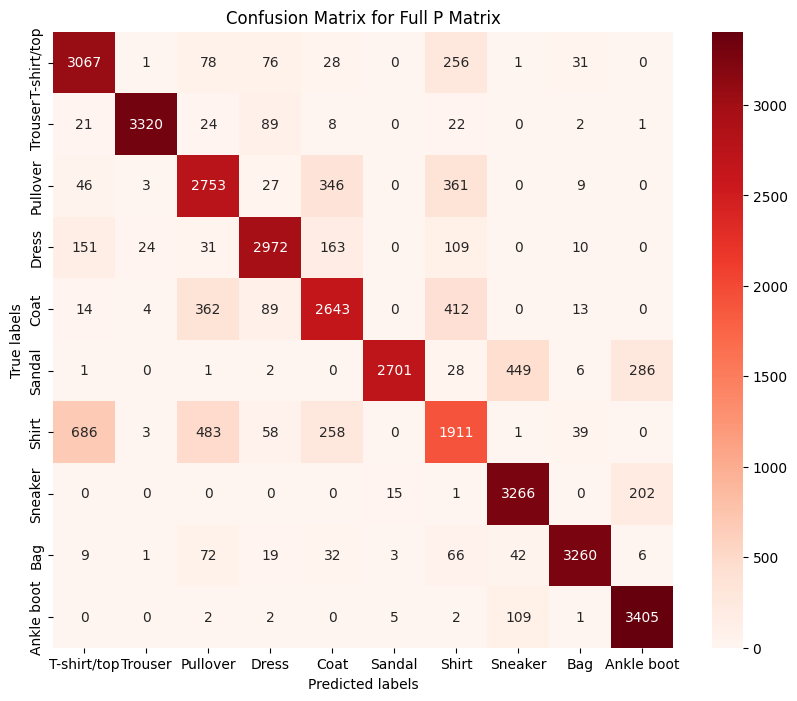

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Defining class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag',
               'Ankle boot']

# Generating a heatmap from the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_full, annot=True, cmap="Reds", fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Full P Matrix')
plt.show()

Accuracy percentages:

In [16]:
from tabulate import tabulate

In [31]:
# Creating a dictionary with class accuracies
class_accuracies_full = {}
for i in range(10):
  correct = cm_full[i, i]
  total = sum(cm_full[i])

  accuracy = 100 * correct / total

  class_accuracies_full[class_names[i]] = round(accuracy, 2)

# Turning the dictionary into a table
table_full = [[key, value] for key, value in class_accuracies_full.items()]

# Print the accuracies for each class in a Markdown formatted table
print(tabulate(table_full, headers=["Class", "Accuracy %"], tablefmt='pipe'))

| Class       |   Accuracy % |
|:------------|-------------:|
| T-shirt/top |        86.69 |
| Trouser     |        95.21 |
| Pullover    |        77.66 |
| Dress       |        85.9  |
| Coat        |        74.72 |
| Sandal      |        77.75 |
| Shirt       |        55.57 |
| Sneaker     |        93.74 |
| Bag         |        92.88 |
| Ankle boot  |        96.57 |


**Code for Problem 4**

In [34]:
P_200 = P[:200] # Reducing to the first 200 principal components

# Reducing data from 784 dimensions to 200
p_reduced_train_images = np.transpose(np.dot(P_200, np.transpose(train_images)))
p_reduced_test_images = np.dot(P_200, test_images.T).T

In [36]:
accuracy, cm_200 = knn(p_reduced_train_images, p_reduced_test_images, train_labels, test_labels, 20)

print(f"Accuracy: {accuracy}")

Accuracy: 0.8469714285714286


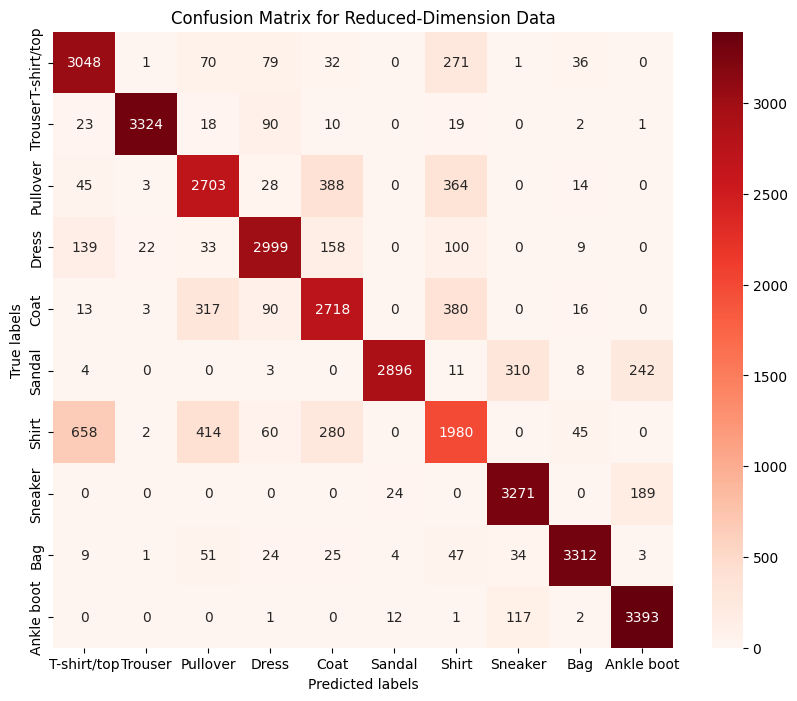

In [39]:
# Generating a heatmap from the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_200, annot=True, cmap="Reds", fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Reduced-Dimension Data')
plt.show()

In [40]:
# Creating a dictionary with class accuracies
class_accuracies_200 = {}
for i in range(10):
  correct = cm_200[i, i]
  total = sum(cm_200[i])

  accuracy = 100 * correct / total

  class_accuracies_200[class_names[i]] = round(accuracy, 2)

# Turning the dictionary into a table
table_200 = [[key, value] for key, value in class_accuracies_200.items()]

# Print the accuracies for each class in a Markdown formatted table
print(tabulate(table_200, headers=["Class", "Accuracy %"], tablefmt='pipe'))

| Class       |   Accuracy % |
|:------------|-------------:|
| T-shirt/top |        86.15 |
| Trouser     |        95.33 |
| Pullover    |        76.25 |
| Dress       |        86.68 |
| Coat        |        76.84 |
| Sandal      |        83.36 |
| Shirt       |        57.57 |
| Sneaker     |        93.89 |
| Bag         |        94.36 |
| Ankle boot  |        96.23 |


In [58]:
original = p_train_images.T
reduced = p_reduced_train_images.T

original_var = 0
retained_var = 0
for i in range(784):
  original_var += original[i].var()
  if i < 200:
    retained_var += reduced[i].var()

pct = retained_var / original_var
pct *= 100

print(f"{round(pct, 2)}% of variance retained.")

95.37% of variance retained.
